<a href="https://colab.research.google.com/github/Rogercas1/DS201Final/blob/main/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
csv = "heart.csv"
df = pd.read_csv(csv)

In [3]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.duplicated().sum()

1

In [5]:
# Remove an duplicates existing in data
df.drop_duplicates(inplace=True)

In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

Let's standardize the data to make sure no outliers will affect the accuracy of the models we plan on using. 

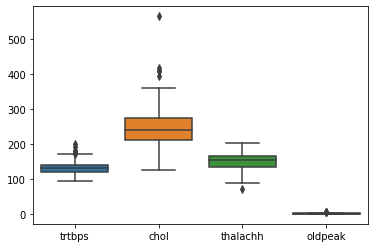

In [7]:
# Plot multidigit columbs
sns.boxplot(data = df[['trtbps', 'chol', 'thalachh', 'oldpeak']])

We see some outliers in the blood pressure, cholestoral, and maximum heart rate achieved columns

In [8]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
scaler = RobustScaler() # Robust scaler is not impacted by outliers

In [9]:
X = df.drop(['output'],axis=1)
y = df[['output']]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [11]:
X_train = scaler.fit_transform(X_train) # Fit_transform allows use to scale training data allowing us to learn mean anad variances of data which can be applied to test data
X_test = scaler.fit_transform(X_test)

In [12]:
X_train, X_test

(array([[-1.        , -1.        ,  0.5       , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.76923077, -1.        ,  0.5       , ...,  0.        ,
          1.        ,  0.        ],
        [ 0.15384615,  0.        ,  0.5       , ...,  1.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  1.        , ...,  0.        ,
          0.        ,  1.        ],
        [-0.69230769,  0.        ,  0.5       , ...,  1.        ,
          0.        ,  0.        ],
        [ 0.15384615,  0.        ,  0.5       , ...,  1.        ,
          2.        ,  1.        ]]),
 array([[ 0.6       ,  0.        ,  0.        , -0.5       ,  0.75925926,
          0.        , -1.        , -1.58064516,  0.        ,  0.5       ,
         -1.        ,  1.        ,  1.        ],
        [ 0.73333333,  0.        ,  1.        ,  2.        , -0.24074074,
          0.        , -1.        ,  0.09677419,  0.        ,  0.        ,
         -1.        ,  0.   

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)
predicted=model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
accuracy_score(y_test, predicted)*100

86.88524590163934

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8852459016393442

In [16]:
neighbors = list(range(1,26))
train_scores = []
test_scores = []

In [17]:
for i in neighbors:
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))
#    preds_neighbors = clf.predict(X_test)
#    train_scores.append(accuracy_score(y_true = y_test, y_pred = preds_neighbors))
#    test_scores.append(accuracy_score(y_true = y_test, y_pred = preds_neighbors))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

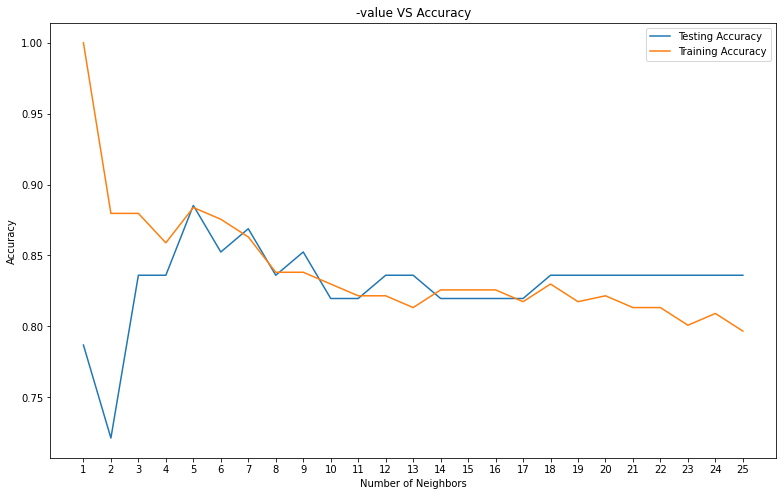

In [18]:
plt.figure(figsize=[13,8])
plt.plot(neighbors, test_scores, label = 'Testing Accuracy')
plt.plot(neighbors, train_scores, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neighbors)
plt.savefig('graph.png')
plt.show()

In [19]:
from sklearn import metrics
knn= KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train,y_train)
knnpred = knn.predict(X_test)
print(metrics.classification_report(y_test,knnpred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88        27
           1       0.97      0.82      0.89        34

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.89        61



/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [20]:
neighbors = list(range(1,26))
scores = []

In [21]:
for i in neighbors:
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train, y_train)
    preds_neighbors = clf.predict(X_test)
    scores.append(accuracy_score(y_true = y_test, y_pred = preds_neighbors))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

Text(0, 0.5, 'Testing Accuracy')

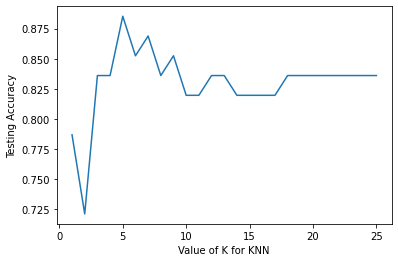

In [22]:
import matplotlib.pyplot as plt
plt.plot(neighbors, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Check to see how MinMax scaler and other scalers impact accuracy

If we want to model our data with K-nearest neihgbors it is important that we scale our data. Especially when calculating distance between data. 
- https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35